In [1]:
!pip install matplotlib

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SAB.csv to SAB.csv


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [4]:
df = pd.read_csv("SAB.csv")
df

,Date,Price,Open,High,Low,Vol.,Change %
0,3/1/2019,"242,000","236,300","246,000","236,300",31.25K,0.83%
1,3/4/2019,"242,000","240,000","245,500","239,000",44.09K,0.00%
2,3/5/2019,"243,500","244,500","244,800","240,100",10.22K,0.62%
3,3/6/2019,"243,900","240,400","245,000","240,000",22.91K,0.16%
4,3/7/2019,"241,100","242,000","242,900","240,500",25.34K,-1.15%
...,...,...,...,...,...,...,...
1310,5/29/2024,"60,500","61,000","61,300","60,300",1.47M,-0.82%
1311,5/30/2024,"59,300","59,600","60,000","58,300",1.67M,-1.98%
1312,5/31/2024,"58,300","59,300","59,300","58,300",1.49M,-1.69%
1313,6/3/2024,"59,400","59,000","60,100","58,700",1.13M,1.89%


In [5]:
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index
df['Date'] = pd.to_datetime(df['Date'])
df["Price"] = df["Price"].str.replace(',', '').astype(float)
df

,Date,Price,Open,High,Low,Vol.,Change %
0,2019-03-01,242000.0,"236,300","246,000","236,300",31.25K,0.83%
1,2019-03-04,242000.0,"240,000","245,500","239,000",44.09K,0.00%
2,2019-03-05,243500.0,"244,500","244,800","240,100",10.22K,0.62%
3,2019-03-06,243900.0,"240,400","245,000","240,000",22.91K,0.16%
4,2019-03-07,241100.0,"242,000","242,900","240,500",25.34K,-1.15%
...,...,...,...,...,...,...,...
1310,2024-05-29,60500.0,"61,000","61,300","60,300",1.47M,-0.82%
1311,2024-05-30,59300.0,"59,600","60,000","58,300",1.67M,-1.98%
1312,2024-05-31,58300.0,"59,300","59,300","58,300",1.49M,-1.69%
1313,2024-06-03,59400.0,"59,000","60,100","58,700",1.13M,1.89%


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      1315 non-null   datetime64[ns]
 1   Price     1315 non-null   float64       
 2   Open      1315 non-null   object        
 3   High      1315 non-null   object        
 4   Low       1315 non-null   object        
 5   Vol.      1315 non-null   object        
 6   Change %  1315 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 72.0+ KB


<h1> # Split the data into training, testing, and validation sets (7:2:1)

In [7]:
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [8]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [9]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [10]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [11]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [12]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315         88057.64
1316         88057.64
1317         88057.64
1318         88057.64
1319         88057.64
1320         88057.64
1321         88057.64
1322         88057.64
1323         88057.64
1324         88057.64
1325         88057.64
1326         88057.64
1327         88057.64
1328         88057.64
1329         88057.64
1330         88057.64
1331         88057.64
1332         88057.64
1333         88057.64
1334         88057.64
1335         88057.64
1336         88057.64
1337         88057.64
1338         88057.64
1339         88057.64
1340         88057.64
1341         88057.64
1342         88057.64
1343         88057.64
1344         88057.64
Predicted closing prices for the next 60 days:
      Predicted Close
1345         88057.64
1346         88057.64
1347         88057.64
1348         88057.64
1349         88057.64
1350         88057.64
1351         88057.64
1352         88057.64
1353         88057.64
1354

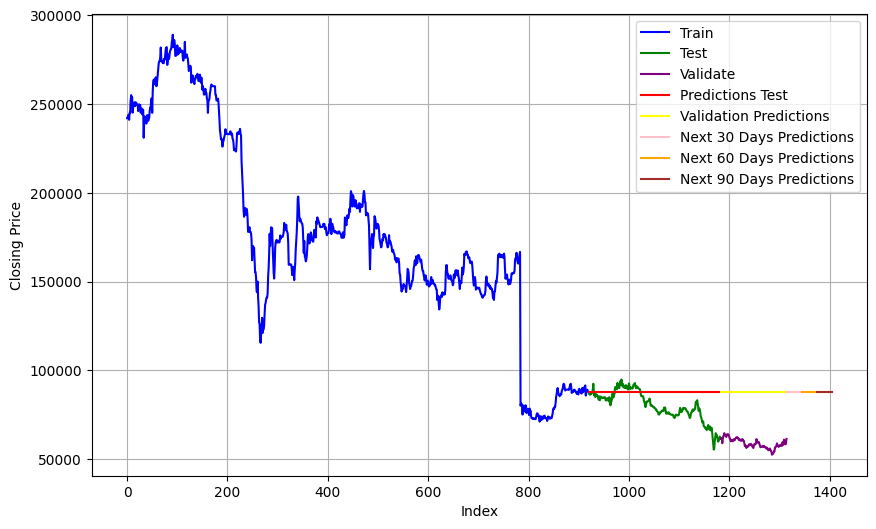

In [13]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [14]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 29282.802890297648
Testing RMSE: 11547.32514704497
Validation MAE: 29163.700606060607
Testing MAE: 9101.396197718628
Validation MAPE: 49.82030205145057
Testing MAPE: 12.499006867134959


<h1> # Split the data into training, testing, and validation sets (6:3:1)

In [24]:
train_size = int(0.6 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [25]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [26]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [27]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [28]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [29]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315         78369.67
1316         78369.67
1317         78369.67
1318         78369.67
1319         78369.67
1320         78369.67
1321         78369.67
1322         78369.67
1323         78369.67
1324         78369.67
1325         78369.67
1326         78369.67
1327         78369.67
1328         78369.67
1329         78369.67
1330         78369.67
1331         78369.67
1332         78369.67
1333         78369.67
1334         78369.67
1335         78369.67
1336         78369.67
1337         78369.67
1338         78369.67
1339         78369.67
1340         78369.67
1341         78369.67
1342         78369.67
1343         78369.67
1344         78369.67
Predicted closing prices for the next 60 days:
      Predicted Close
1345         78369.67
1346         78369.67
1347         78369.67
1348         78369.67
1349         78369.67
1350         78369.67
1351         78369.67
1352         78369.67
1353         78369.67
1354

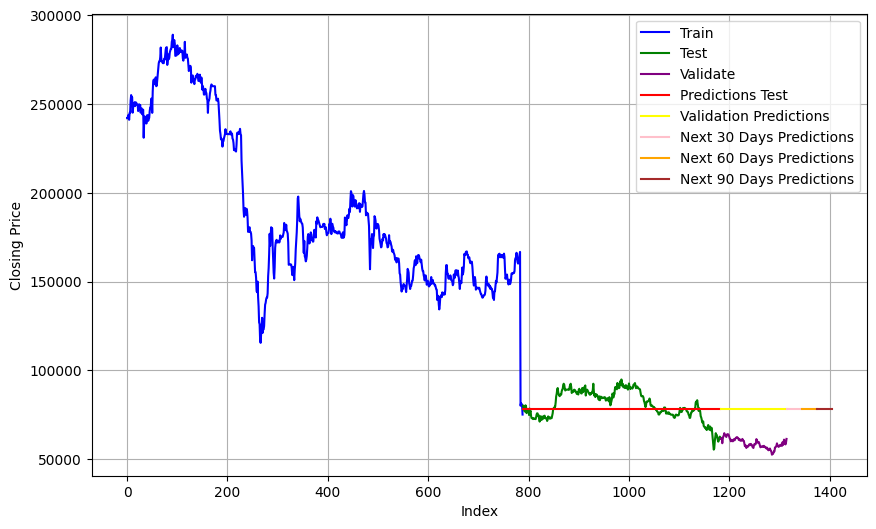

In [30]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [31]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 19653.630573304523
Testing RMSE: 8350.023181518416
Validation MAE: 19475.730606060602
Testing MAE: 6902.821015228427
Validation MAPE: 33.33729624223979
Testing MAPE: 8.588860711597121


<h1> # Split the data into training, testing, and validation sets (5:3:2)

In [41]:
train_size = int(0.5 * len(df))
test_size = int(0.3 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [42]:
#Qua trinh Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

In [43]:
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [44]:
#Qua trinh Testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(x_test)

In [45]:
#Qua trinh Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Price'])
y_pred_val =  model.predict(x_val)

In [46]:
# Create index for the next 30, 60, and 90 days
index_30_days = pd.RangeIndex(start=len(df), stop=len(df) + 30)
index_60_days = pd.RangeIndex(start=len(df) + 30, stop=len(df) + 60)
index_90_days = pd.RangeIndex(start=len(df) + 60, stop=len(df) + 90)

# Extract the closing price of the last day
last_day_close = df.iloc[-1]['Price']

# Create feature arrays for the next 30, 60, and 90 days
features_30_days = np.repeat(last_day_close, 30)
features_60_days = np.repeat(last_day_close, 30)
features_90_days = np.repeat(last_day_close, 30)

# Predict the closing prices for the next 30, 60, and 90 days
predictions_30_days = model.predict(features_30_days.reshape(-1, 1))
predictions_60_days = model.predict(features_60_days.reshape(-1, 1))
predictions_90_days = model.predict(features_90_days.reshape(-1, 1))

# Create a dataframe to store the predicted prices with the new index
predicted_30_days_df = pd.DataFrame(predictions_30_days, index=index_30_days, columns=['Predicted Close'])
predicted_60_days_df = pd.DataFrame(predictions_60_days, index=index_60_days, columns=['Predicted Close'])
predicted_90_days_df = pd.DataFrame(predictions_90_days, index=index_90_days, columns=['Predicted Close'])

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(predicted_30_days_df)

# Print the predicted closing prices for the next 60 and 90 days
print('Predicted closing prices for the next 60 days:')
print(predicted_60_days_df)

print('Predicted closing prices for the next 90 days:')
print(predicted_90_days_df)

Predicted closing prices for the next 30 days:
      Predicted Close
1315         156187.4
1316         156187.4
1317         156187.4
1318         156187.4
1319         156187.4
1320         156187.4
1321         156187.4
1322         156187.4
1323         156187.4
1324         156187.4
1325         156187.4
1326         156187.4
1327         156187.4
1328         156187.4
1329         156187.4
1330         156187.4
1331         156187.4
1332         156187.4
1333         156187.4
1334         156187.4
1335         156187.4
1336         156187.4
1337         156187.4
1338         156187.4
1339         156187.4
1340         156187.4
1341         156187.4
1342         156187.4
1343         156187.4
1344         156187.4
Predicted closing prices for the next 60 days:
      Predicted Close
1345         156187.4
1346         156187.4
1347         156187.4
1348         156187.4
1349         156187.4
1350         156187.4
1351         156187.4
1352         156187.4
1353         156187.4
1354

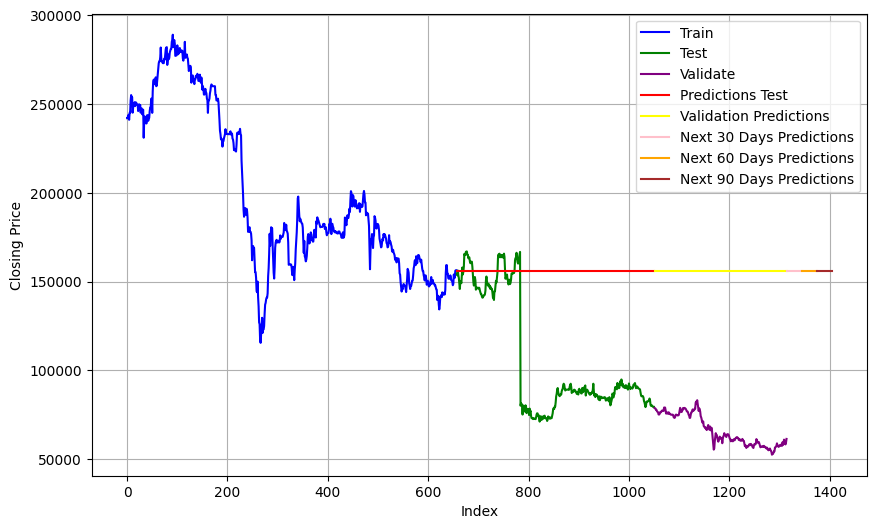

In [47]:
#Vẽ hình
plt.figure(figsize=(10, 6))
plt.plot(x_train, y_train, color='blue', label='Train')
plt.plot(x_test, y_test, color='green', label='Test')
plt.plot(x_val, y_val, color='purple', label='Validate')
plt.plot(x_test, y_pred, color='red', label='Predictions Test')
plt.plot(x_val, y_pred_val, color='yellow', label='Validation Predictions')
plt.plot(predicted_30_days_df, color='pink', label='Next 30 Days Predictions')
plt.plot(predicted_60_days_df, color='orange', label='Next 60 Days Predictions')
plt.plot(predicted_90_days_df, color='brown', label='Next 90 Days Predictions')
plt.xlabel('Index')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [48]:
#Tính RMSE, MAE, MAPE
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_absolute_error

valid_mse = mean_squared_error(y_val, y_pred_val)
test_mse = mean_squared_error(y_test, y_pred)

valid_rmse = np.sqrt(valid_mse)
test_rmse = np.sqrt(test_mse)

valid_mae = mean_absolute_error(y_val, y_pred_val)
test_mae = mean_absolute_error(y_test, y_pred)

valid_mape = mean_absolute_percentage_error(y_val, y_pred_val)*100
test_mape = mean_absolute_percentage_error(y_test, y_pred)*100

print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 90432.79724438523
Testing RMSE: 59647.51937328063
Validation MAE: 90022.69166666667
Testing MAE: 51139.46142131981
Validation MAPE: 139.98882621192496
Testing MAPE: 60.19387010819691
